In [1]:
#|default_exp app

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_Bear(x): return x[0].isupper()

In [18]:
#|export
path  = Path('images_to_test/')

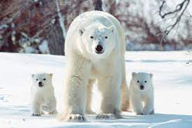

In [4]:
im = PILImage.create(path/'polar1.jpg')
im.thumbnail((192,192))
im

In [5]:
#|export
learn = load_learner('model.pkl')

In [16]:
learn.predict(im)

((#5) ['a','l','o','p','r'],
 tensor([ True, False, False, False, False, False, False, False,  True, False,
          True,  True,  True, False, False, False]),
 tensor([9.9872e-01, 4.3767e-03, 1.8019e-03, 1.6157e-04, 2.8359e-03, 4.5082e-03,
         5.0340e-03, 2.8159e-03, 9.9982e-01, 2.6259e-03, 1.0000e+00, 9.9996e-01,
         1.0000e+00, 3.8473e-03, 6.5282e-04, 1.0391e-02]))

In [9]:
#|export
def show_predict(img):
    l = learn.predict(img)
    if l[0] == ['a','d','n','p']:
        res = 'Panda bear'
    elif l[0] == ['g','i','l','r','y','z']:
        res = 'Grizzly Bear'
    elif l[0] == ['d','e','t','y']:
        res = 'Teddy Bear'
    elif l[0] == ['a','l','o','p','r']:
        res = 'Polar Bear'
    elif l[0] == ['a','b','c','k','l']:
        res = 'Black Bear'
    else:
        res = "Others"
    return res

In [17]:
show_predict(im)

'Polar Bear'

In [21]:
#|export
image = gr.Image(shape=(192,192))
label = gr.Label()
examples = [path/'polar1.jpg', path/'griz.jpg',path/'donno.jpg',path/'black.jpg',path/'panda1.jpg',path/'images.jpg',path/'polar2.jpg',path/'many_mug.jpg']

intf = gr.Interface(fn=show_predict, inputs=image, outputs=label, examples=examples,
                   title = "Bear Classifier Using Multilabel Classification")
intf.launch(inline = False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [22]:
import nbdev.export

In [23]:
nbdev.export.nb_export('Bear_gradio_app.ipynb','./')